In [12]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df<-read.csv("df_sudamerica.csv")
head(df)

,Area,Year,Savanna.fires,Forest.fires,Crop.Residues,Rice.Cultivation,Drained.organic.soils..CO2.,Pesticides.Manufacturing,Food.Transport,Forestland,⋯,Manure.Management,Fires.in.organic.soils,Fires.in.humid.tropical.forests,On.farm.energy.use,Rural.population,Urban.population,Total.Population...Male,Total.Population...Female,total_emission,Average.Temperature..C
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Argentina,1990,2779.692,1097.178,1965.499,914.3008,5128.514,689,2920.126,-40102.73,⋯,2173.349,0,541.3267,6077.228,4260175,28469564,16063515,16574141,114303.1,0.3300833
2,Argentina,1991,2779.692,1097.178,2144.235,676.3176,5128.514,699,3143.701,-40102.73,⋯,2148.927,0,541.3267,4813.008,4206419,28987499,16298168,16807594,112979.8,0.1930833
3,Argentina,1992,2779.692,1097.178,2248.566,1103.0880,5128.514,631,3514.505,-40102.73,⋯,2184.396,0,541.3267,6846.902,4192854,29462297,16529209,17039077,114888.8,-0.2140833
4,Argentina,1993,2779.692,1097.178,2235.483,1094.8560,5128.514,571,3733.810,-40102.73,⋯,2177.431,0,541.3267,7553.773,4177901,29933016,16757748,17269492,115580.6,0.1254167
5,Argentina,1994,2779.692,1097.178,2233.539,1108.1056,5128.514,693,3935.743,-40102.73,⋯,2241.324,0,541.3267,8927.248,4160961,30397154,16989567,17499129,118040.6,0.6264167
6,Argentina,1995,2779.692,1097.178,2404.908,1443.4616,5138.312,872,4168.870,-40102.73,⋯,2200.746,0,541.3267,9032.746,4141986,30852828,17220607,17725502,118055.0,0.2660000


# EDA

In [3]:
dim(df)

[1] 310  31

In [4]:
sum(is.na(df))

[1] 31

In [5]:
df_sin_nulos <- na.omit(df)
dim(df_sin_nulos)

[1] 279  31

In [6]:
# Asegúrate de que las variables categóricas estén como factores
df$Area <- as.factor(df$Area)
df$Year <- as.factor(df$Year)

# Seleccionamos solo las columnas numéricas (las emisiones de CO₂)
df_numeric <- df[, sapply(df, is.numeric)]

# Verificar si hay datos faltantes
summary(df_numeric)

 Savanna.fires       Forest.fires      Crop.Residues      Rice.Cultivation 
 Min.   :    0.13   Min.   :    0.00   Min.   :   10.12   Min.   :  41.94  
 1st Qu.:   15.26   1st Qu.:   10.25   1st Qu.:  123.65   1st Qu.: 466.31  
 Median :   35.90   Median :  122.32   Median :  215.30   Median :1301.58  
 Mean   : 1711.73   Mean   : 1500.97   Mean   : 1358.54   Mean   :1704.00  
 3rd Qu.: 1601.88   3rd Qu.:  514.04   3rd Qu.:  432.57   3rd Qu.:2331.29  
 Max.   :23503.32   Max.   :27663.50   Max.   :13452.46   Max.   :8525.13  
                                                                           
 Drained.organic.soils..CO2. Pesticides.Manufacturing Food.Transport     
 Min.   :   0.0              Min.   :   0.00          Min.   :    5.024  
 1st Qu.: 101.6              1st Qu.:  17.25          1st Qu.:  272.509  
 Median : 444.0              Median : 166.00          Median : 1171.260  
 Mean   :1079.4              Mean   :1057.78          Mean   : 3126.688  
 3rd Qu.:1000.4       

## Correlograma

### Realizamos un correlograma entre todas las variables cuantitativas.

¿Cómo es la relación del total_emission con las demás variables?

Warning message in cor(df_numeric, use = "complete.obs"):
“the standard deviation is zero”


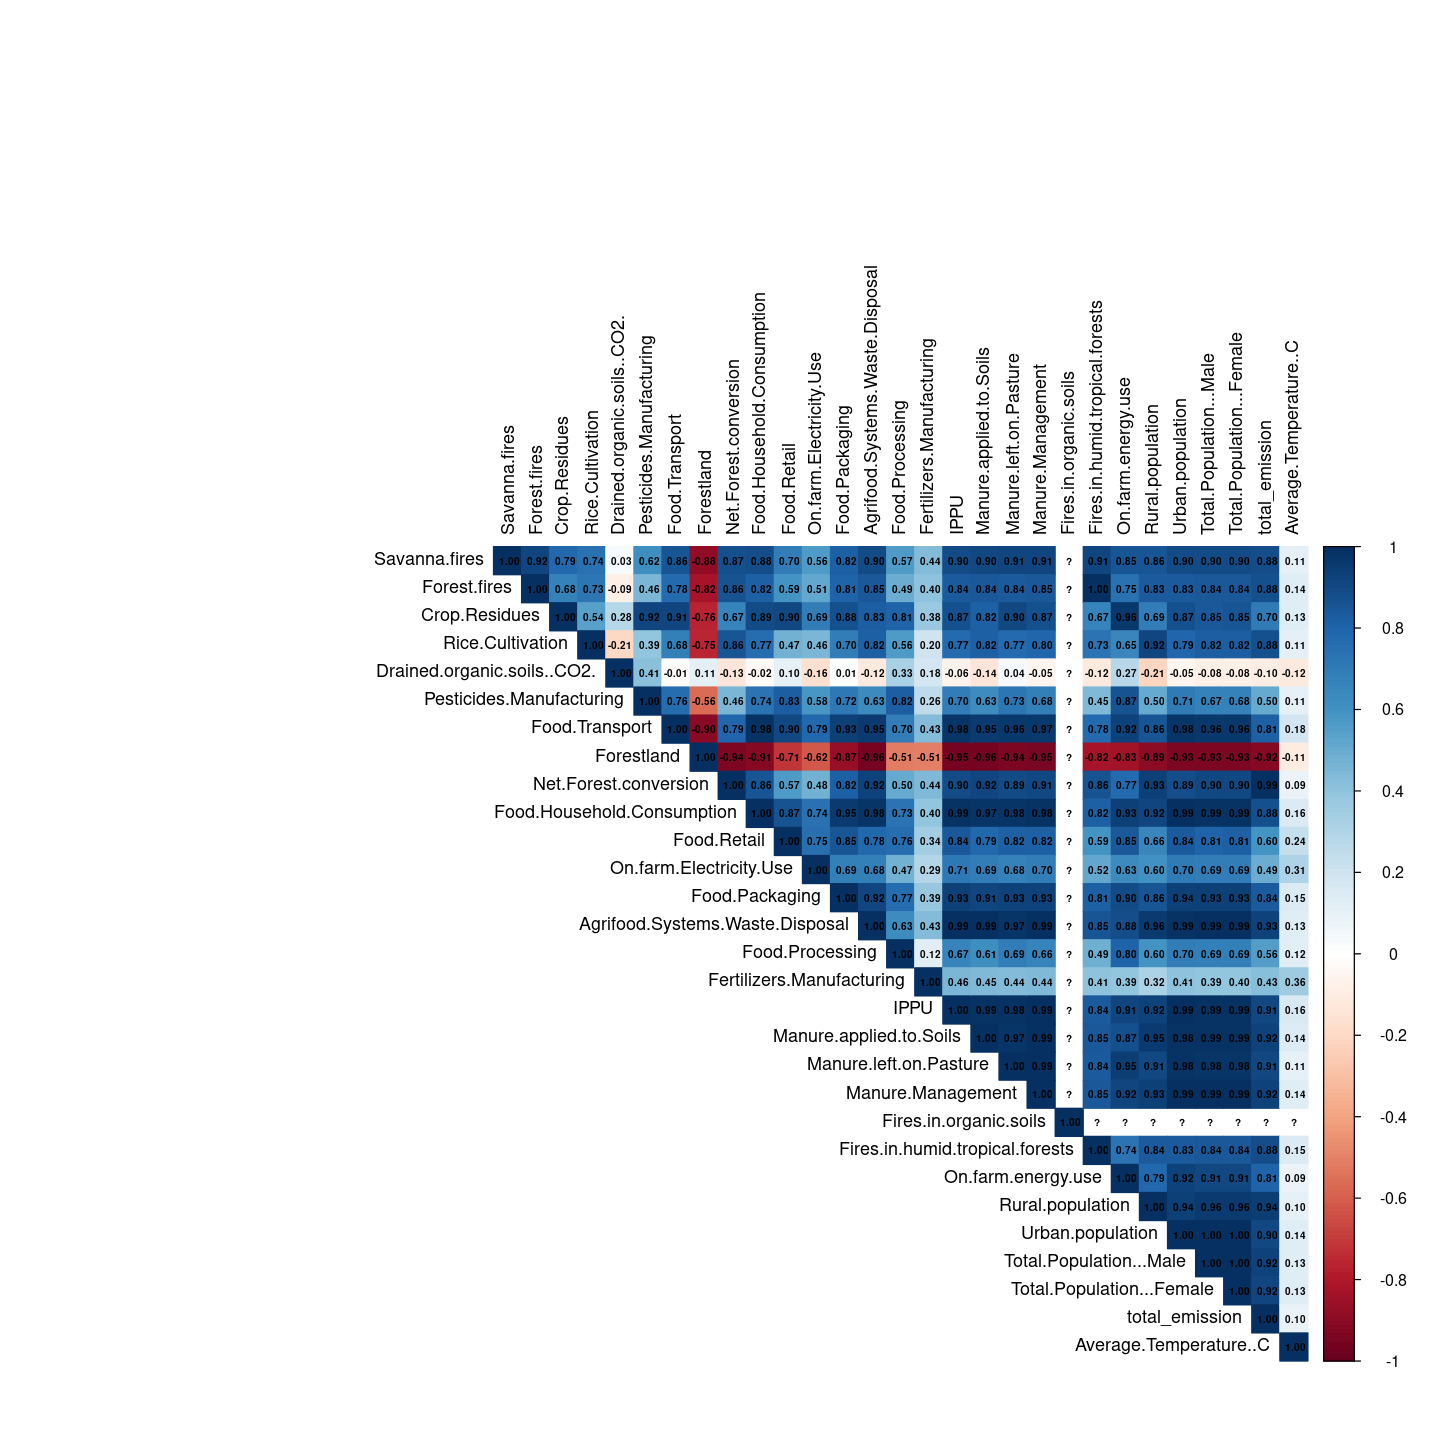

In [13]:
options(repr.plot.width=12, repr.plot.height=12)

library(corrplot)

cor_matrix <- cor(df_numeric, use = "complete.obs")
corrplot(cor_matrix, method = "color", type = "upper", 
         tl.cex = 0.9, # Tamaño del texto
         tl.col = "black", # Color del texto
         addCoef.col = "black", # Mostrar coeficientes de correlación
         number.cex = 0.5) # Tamaño de los coeficientes


# Modelo Lineal

Vamos a probar un modelo lineal que incluya todas las variables (excepto al Area y Year - tambien eliminamos On.farm.energy.use por tener muchos NA) y obtener las estimaciones de los parámetros junto a su p-valor e intervalo de confianza.

In [16]:
library(broom)
df_numeric_clean <- df_numeric %>%
  select(-On.farm.energy.use)

# Volver a correr el modelo
modelo_lineal = df_numeric_clean %>% lm(formula = total_emission ~ ., data = .)

# Obtener los coeficientes con intervalos de confianza
lineal_coef = modelo_lineal %>% tidy(conf.int = TRUE)

# Ver los coeficientes
lineal_coef

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.500626e+02,1.439004e+02,-2.4326731,1.560761e-02,-6.333136e+02,-6.681169e+01
Savanna.fires,9.786090e-01,5.367394e-02,18.2324778,1.168936e-49,8.729581e-01,1.084260e+00
Forest.fires,1.523764e+00,1.827059e-01,8.3399820,3.290352e-15,1.164129e+00,1.883399e+00
Crop.Residues,1.972507e+00,1.719029e-01,11.4745442,2.787002e-25,1.634137e+00,2.310878e+00
Rice.Cultivation,1.005261e+00,9.487325e-02,10.5958311,2.583815e-22,8.185142e-01,1.192008e+00
Drained.organic.soils..CO2.,1.142185e+00,7.632695e-02,14.9643743,1.067853e-37,9.919445e-01,1.292426e+00
Pesticides.Manufacturing,1.125120e+00,1.081554e-01,10.4028099,1.125302e-21,9.122289e-01,1.338011e+00
Food.Transport,5.394190e-01,1.471215e-01,3.6664853,2.936459e-04,2.498276e-01,8.290104e-01
Forestland,1.000022e+00,2.662290e-03,375.6246548,0.000000e+00,9.947813e-01,1.005262e+00


## Graficamos los coeficientes estimados. 

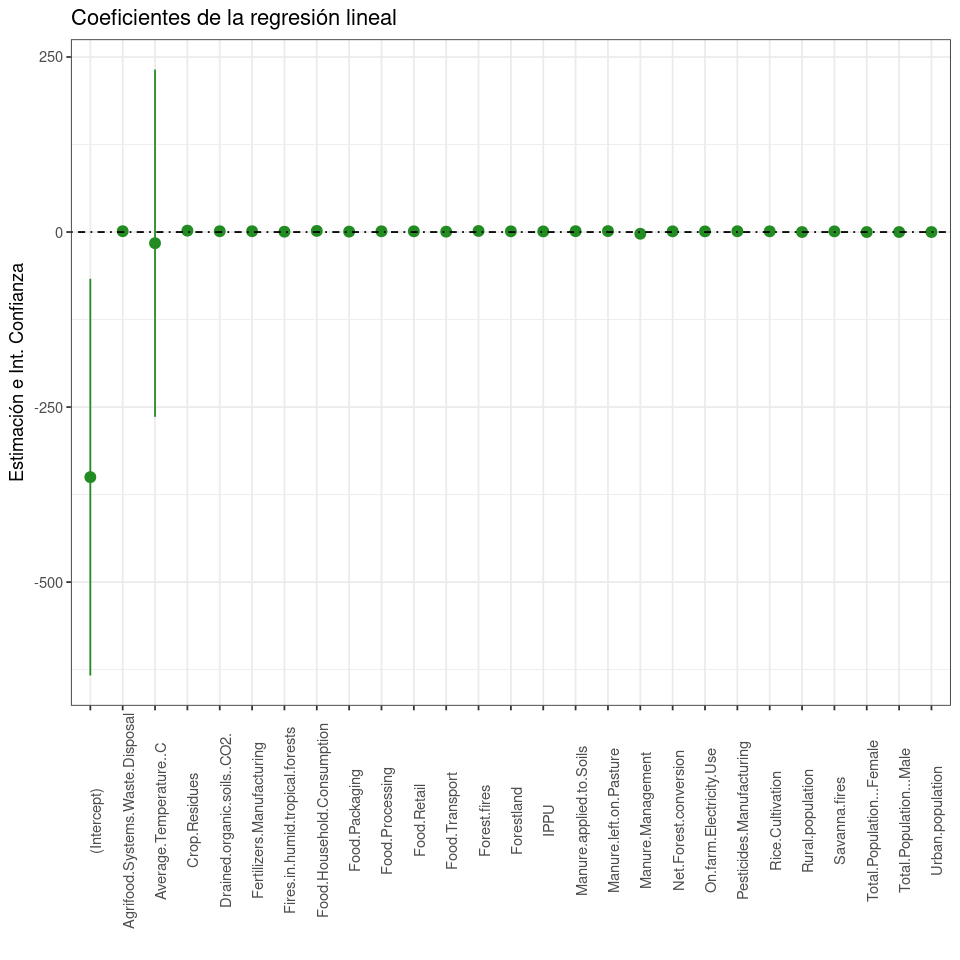

In [19]:
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=8)

lineal_coef %>% filter(!is.na(estimate)) %>% 
  ggplot(., aes(term, estimate))+
  geom_point(color = "forestgreen")+
  geom_pointrange(aes(ymin = conf.low, ymax = conf.high), color = "forestgreen")+
  geom_hline(yintercept = 0, lty = 4, color = "black") +
  labs(title = "Coeficientes de la regresión lineal", x="", y="Estimación e Int. Confianza") +
  theme_bw() +
  theme(axis.text.x = element_text(angle=90))

## Graficamos los p-valores de mayor a menor para evaluar la significatividad individual de los coeficientes estimados. 

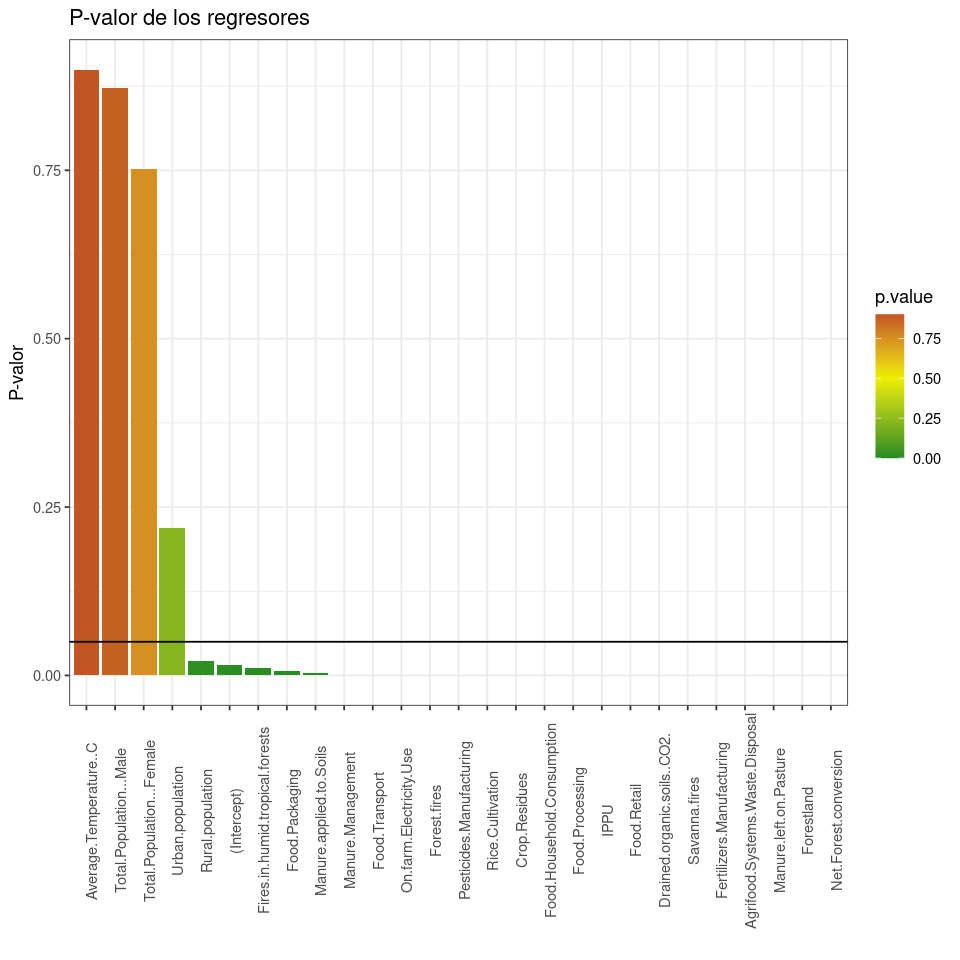

In [21]:
lineal_coef %>% filter(!is.na(estimate)) %>% 
  ggplot(., aes(reorder(term, -p.value), p.value, fill=p.value))+
  geom_bar(stat = 'identity', aes(fill=p.value))+
  geom_hline(yintercept = 0.05) +
  labs(title = "P-valor de los regresores", x="", y="P-valor") +
  theme_bw() +
  theme(axis.text.x = element_text(angle=90)) + 
  scale_fill_gradient2(high='firebrick', low = 'forestgreen', mid='yellow2',midpoint = 0.5 )

#### Cuando una variable se puede expresar como una combinación lineal de otra, el modelo lineal de R devuelve los valores de los coeficientes estimados como *NA*.

Para evitar los problemas que puede introducir la escala, reescalamos las variables con el comando `scale` y repetimos el ajuste para estos nuevos datos.

In [22]:
lineal_coef %>% filter(is.na(estimate))

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fires.in.organic.soils,NA,NA,NA,NA,NA,NA


In [17]:
# Convierto a factor las variables categoricas

df$Area <- as.factor(df$Area)
df$Year <- as.factor(df$Year)

df_scaled <- df %>%
  mutate(across(where(is.numeric), scale))

head(df_scaled)

,Area,Year,Savanna.fires,Forest.fires,Crop.Residues,Rice.Cultivation,Drained.organic.soils..CO2.,Pesticides.Manufacturing,Food.Transport,Forestland,⋯,Manure.Management,Fires.in.organic.soils,Fires.in.humid.tropical.forests,On.farm.energy.use,Rural.population,Urban.population,Total.Population...Male,Total.Population...Female,total_emission,Average.Temperature..C
,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,Argentina,1990,0.2975738,-0.09816771,0.2299507,-0.4823964,2.548872,-0.18515878,-0.037021021,0.09574064,⋯,0.1310113,NaN,-0.2009971,0.3382143,-0.2362174,0.03298613,-0.0173039293,-0.010339044,-0.1518168,-0.9083073
2,Argentina,1991,0.2975738,-0.09816771,0.2976663,-0.6277716,2.548872,-0.18013796,0.003049122,0.09574064,⋯,0.1233759,NaN,-0.2009971,0.1339211,-0.2420052,0.04470161,-0.0083388696,-0.001641946,-0.1555233,-1.2325462
3,Argentina,1992,0.2975738,-0.09816771,0.3371932,-0.3670732,2.548872,-0.21427951,0.069505915,0.09574064,⋯,0.1344652,NaN,-0.2009971,0.4625908,-0.2434657,0.05544135,0.0004881915,0.006981762,-0.1501761,-2.1961904
4,Argentina,1993,0.2975738,-0.09816771,0.3322365,-0.3721018,2.548872,-0.24440441,0.108810682,0.09574064,⋯,0.1322876,NaN,-0.2009971,0.5768185,-0.2450757,0.06608882,0.0092196621,0.015565681,-0.1482386,-1.3926934
5,Argentina,1994,0.2975738,-0.09816771,0.3314998,-0.3640081,2.548872,-0.18315045,0.145001936,0.09574064,⋯,0.1522633,NaN,-0.2009971,0.7987670,-0.2468996,0.07658743,0.0180764471,0.024120618,-0.1413483,-0.2069731
6,Argentina,1995,0.2975738,-0.09816771,0.3964248,-0.1591514,2.555040,-0.09327784,0.186783757,0.09574064,⋯,0.1395769,NaN,-0.2009971,0.8158151,-0.2489426,0.08689459,0.0269034700,0.032553956,-0.1413081,-1.0599738


In [20]:
df_scaled_clean <- df_scaled %>%
  select(-23, -Area, -Year) 
colnames(df_scaled_clean)

[1] "Savanna.fires"                   "Forest.fires"                   
 [3] "Crop.Residues"                   "Rice.Cultivation"               
 [5] "Drained.organic.soils..CO2."     "Pesticides.Manufacturing"       
 [7] "Food.Transport"                  "Forestland"                     
 [9] "Net.Forest.conversion"           "Food.Household.Consumption"     
[11] "Food.Retail"                     "On.farm.Electricity.Use"        
[13] "Food.Packaging"                  "Agrifood.Systems.Waste.Disposal"
[15] "Food.Processing"                 "Fertilizers.Manufacturing"      
[17] "IPPU"                            "Manure.applied.to.Soils"        
[19] "Manure.left.on.Pasture"          "Manure.Management"              
[21] "Fires.in.humid.tropical.forests" "On.farm.energy.use"             
[23] "Rural.population"                "Urban.population"               
[25] "Total.Population...Male"         "Total.Population...Female"      
[27] "total_emission"                  "Average.Temperature..C"

In [23]:
#library(broom)

# Volver a correr el modelo
modelo_lineal_scal = df_scaled_clean %>% lm(formula = total_emission ~ ., data = .)

# Obtener los coeficientes con intervalos de confianza
lineal_coef_scal = modelo_lineal_scal %>% tidy(conf.int = TRUE)

# Ver los coeficientes
lineal_coef_scal


Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.115954e-03,5.086434e-17,2.193981e+13,0.0000000,1.115954e-03,1.115954e-03
Savanna.fires,1.005213e-02,1.919747e-16,5.236176e+13,0.0000000,1.005213e-02,1.005213e-02
Forest.fires,1.152091e-02,9.895459e-16,1.164263e+13,0.0000000,1.152091e-02,1.152091e-02
Crop.Residues,7.392979e-03,4.913017e-16,1.504774e+13,0.0000000,7.392979e-03,7.392979e-03
Rice.Cultivation,4.585149e-03,1.814905e-16,2.526386e+13,0.0000000,4.585149e-03,4.585149e-03
Drained.organic.soils..CO2.,4.449464e-03,1.189899e-16,3.739363e+13,0.0000000,4.449464e-03,4.449464e-03
Pesticides.Manufacturing,5.578575e-03,2.243372e-16,2.486692e+13,0.0000000,5.578575e-03,5.578575e-03
Food.Transport,1.562794e-02,8.232081e-16,1.898419e+13,0.0000000,1.562794e-02,1.562794e-02
Forestland,3.511917e-01,3.220885e-16,1.090358e+15,0.0000000,3.511917e-01,3.511917e-01


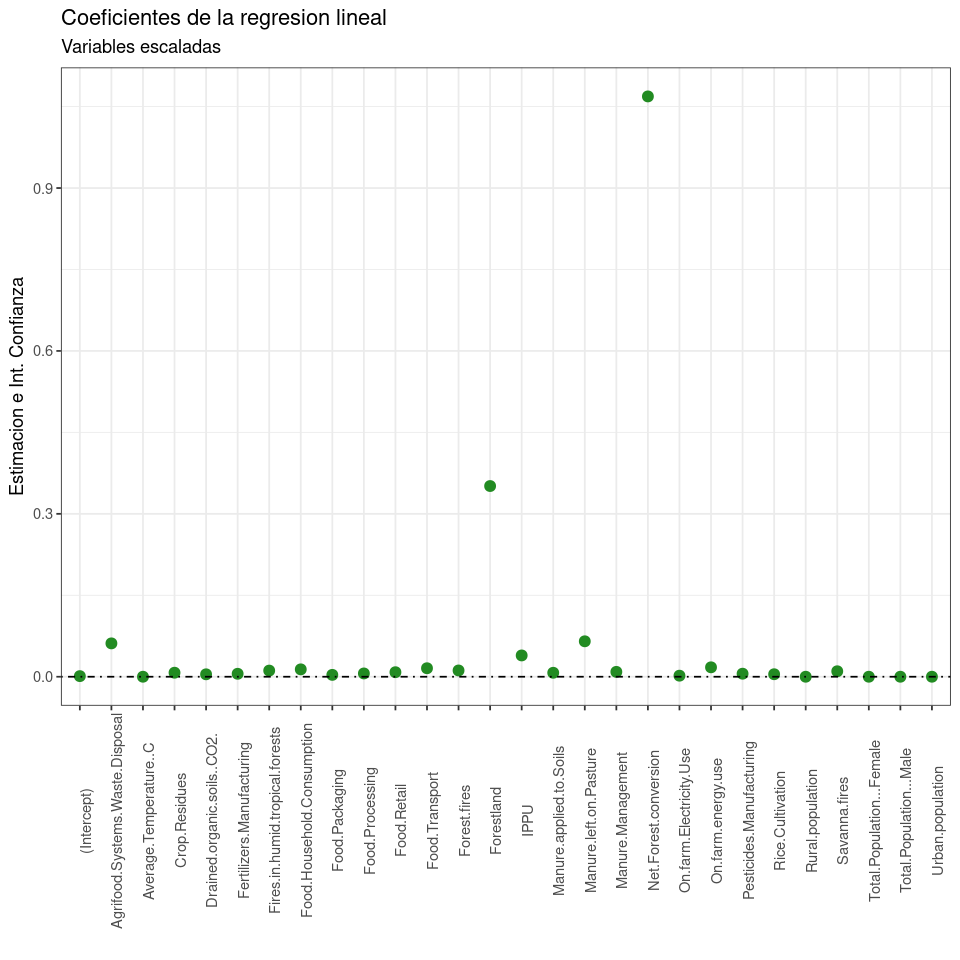

In [24]:
library(ggplot2)

lineal_coef_scal %>% filter(!is.na(estimate)) %>% 
  ggplot(., aes(term, estimate))+
  geom_point()+
  geom_pointrange(aes(ymin = conf.low, ymax = conf.high), color = "forestgreen")+
  geom_hline(yintercept = 0, lty = 4, color = "black") +
  labs(title = "Coeficientes de la regresion lineal", subtitle="Variables escaladas", x="", y="Estimacion e Int. Confianza") +
  theme_bw() +
  theme(axis.text.x = element_text(angle=90))

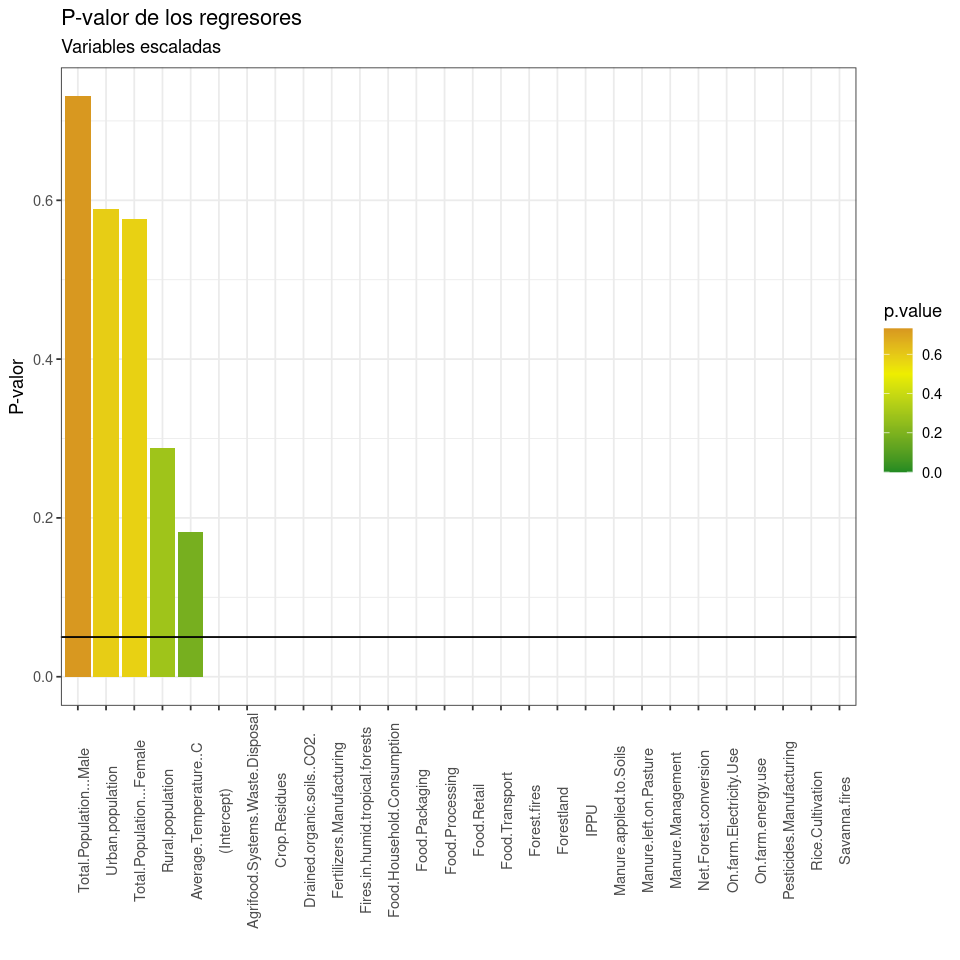

In [25]:
lineal_coef_scal %>% filter(!is.na(estimate)) %>%
  ggplot(., aes(reorder(term, -p.value), p.value, fill=p.value))+
  geom_bar(stat = 'identity', aes(fill=p.value))+
  geom_hline(yintercept = 0.05) +
  labs(title = "P-valor de los regresores",subtitle="Variables escaladas", x="", y="P-valor") +
  theme_bw() +
  theme(axis.text.x = element_text(angle=90)) + 
  scale_fill_gradient2(high='firebrick', low = 'forestgreen', mid='yellow2',midpoint = 0.5 )

In [26]:
lineal_coef_scal %>% filter(is.na(estimate))

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


## Evaluación de los modelos

Obtemos la evaluación de ambos modelos ¿Cómo esperan que sean los valores de las métricas de performance?

In [29]:
# Instalar el paquete purrr si no lo has instalado
#install.packages("purrr")

# Cargar el paquete purrr
#library(purrr)

modelos_lineales = list(lineal = modelo_lineal, lineal_escalado = modelo_lineal_scal)
map_dfr(.x = modelos_lineales, .f = glance, .id="modelo") %>% 
  select(modelo, r.squared, adj.r.squared, p.value)

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”


modelo,r.squared,adj.r.squared,p.value
<chr>,<dbl>,<dbl>,<dbl>
lineal,0.9999961,0.9999957,0
lineal_escalado,1.0000000,1.0000000,0


In [30]:
# Instalar las librerías necesarias si no están ya instaladas
install.packages("glmnet")
install.packages("lars")
install.packages("caret")  # Para la partición de los datos

# Cargar las librerías
library(glmnet)
library(lars)
library(caret)


Installing package into ‘/home/bita/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Installing package into ‘/home/bita/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Installing package into ‘/home/bita/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Loading required package: Matrix

Loaded glmnet 4.1-8

Loaded lars 1.3


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [38]:
df_scaled_clean <- df_scaled_clean %>%
  select(-On.farm.energy.use)

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0
[26]  0  0  0

In [39]:
# Dividir los datos en conjunto de entrenamiento y prueba
set.seed(42)  # Para reproducibilidad
trainIndex <- createDataPartition(df_scaled_clean$total_emission, p = 0.8, list = FALSE)
trainData <- df_scaled_clean[trainIndex,]
testData <- df_scaled_clean[-trainIndex,]

# Separar las características (X) y la variable objetivo (y)
X_train <- as.matrix(trainData[, -which(names(trainData) == "total_emission")])  # Eliminamos la columna objetivo
y_train <- trainData$total_emission
X_test <- as.matrix(testData[, -which(names(testData) == "total_emission")])
y_test <- testData$total_emission


In [40]:
# Entrenar el modelo Lasso
lasso_model <- cv.glmnet(X_train, y_train, alpha = 1)  # alpha = 1 para Lasso

# Predecir con el modelo Lasso
y_pred_lasso <- predict(lasso_model, X_test, s = "lambda.min")

# Evaluar el modelo Lasso
mse_lasso <- mean((y_test - y_pred_lasso)^2)
r2_lasso <- 1 - sum((y_test - y_pred_lasso)^2) / sum((y_test - mean(y_test))^2)

print(paste("MSE Lasso: ", mse_lasso))
print(paste("R² Lasso: ", r2_lasso))


[1] "MSE Lasso:  0.00120040262229026"
[1] "R² Lasso:  0.998996446464158"


In [55]:
# Entrenar el modelo LARS
lars_model <- lars(X_train, y_train, type = "lasso")  

# Predecir con el modelo LARS
y_pred_lars <- predict(lars_model, X_test, type = "fit")$fit

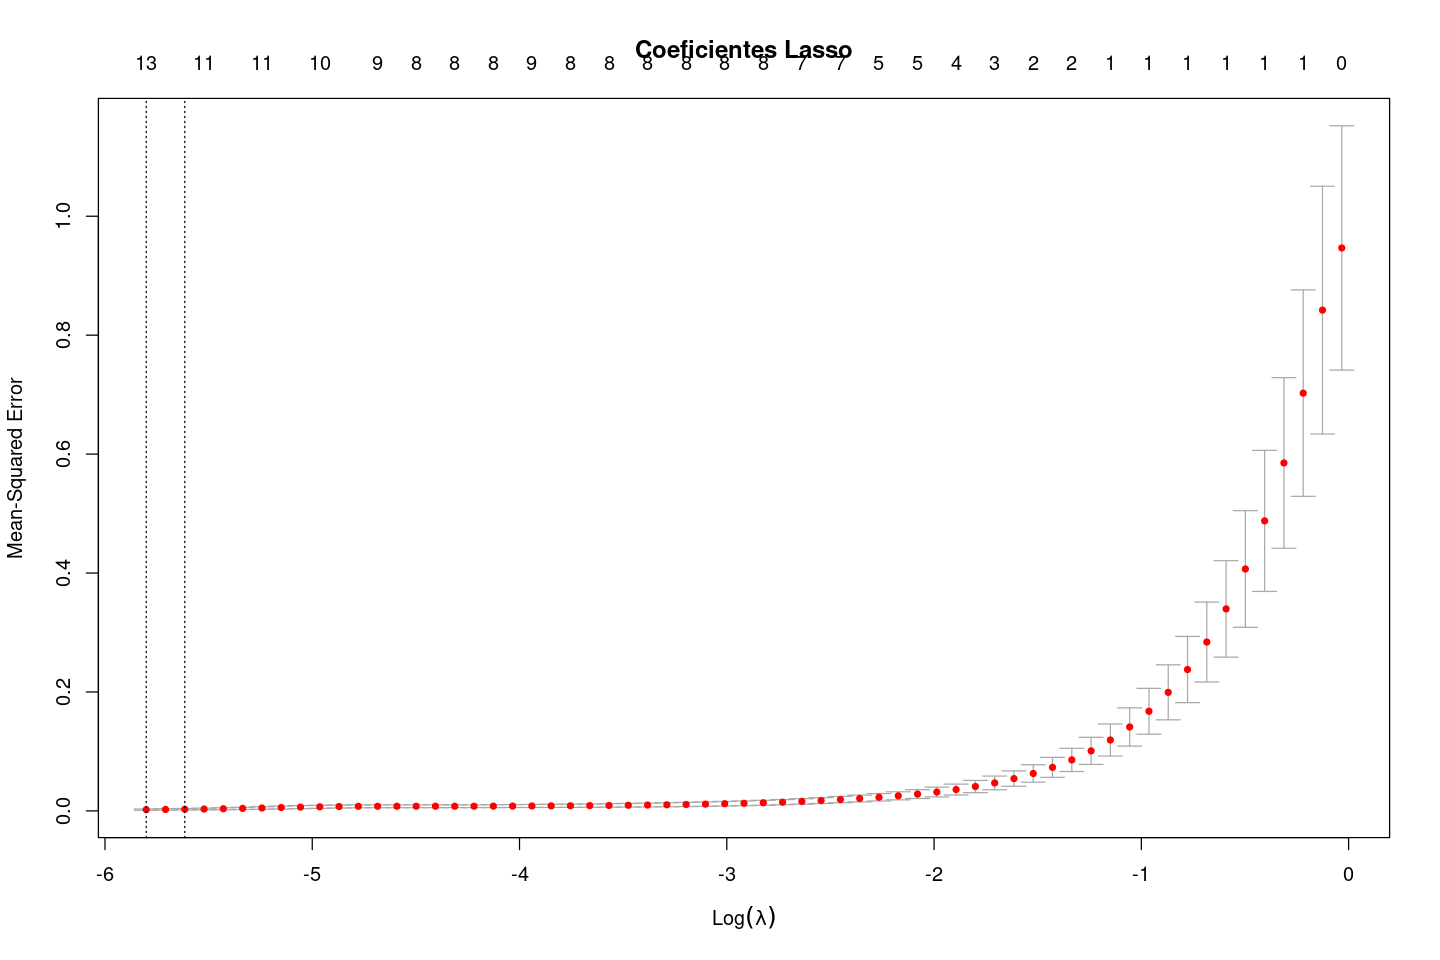

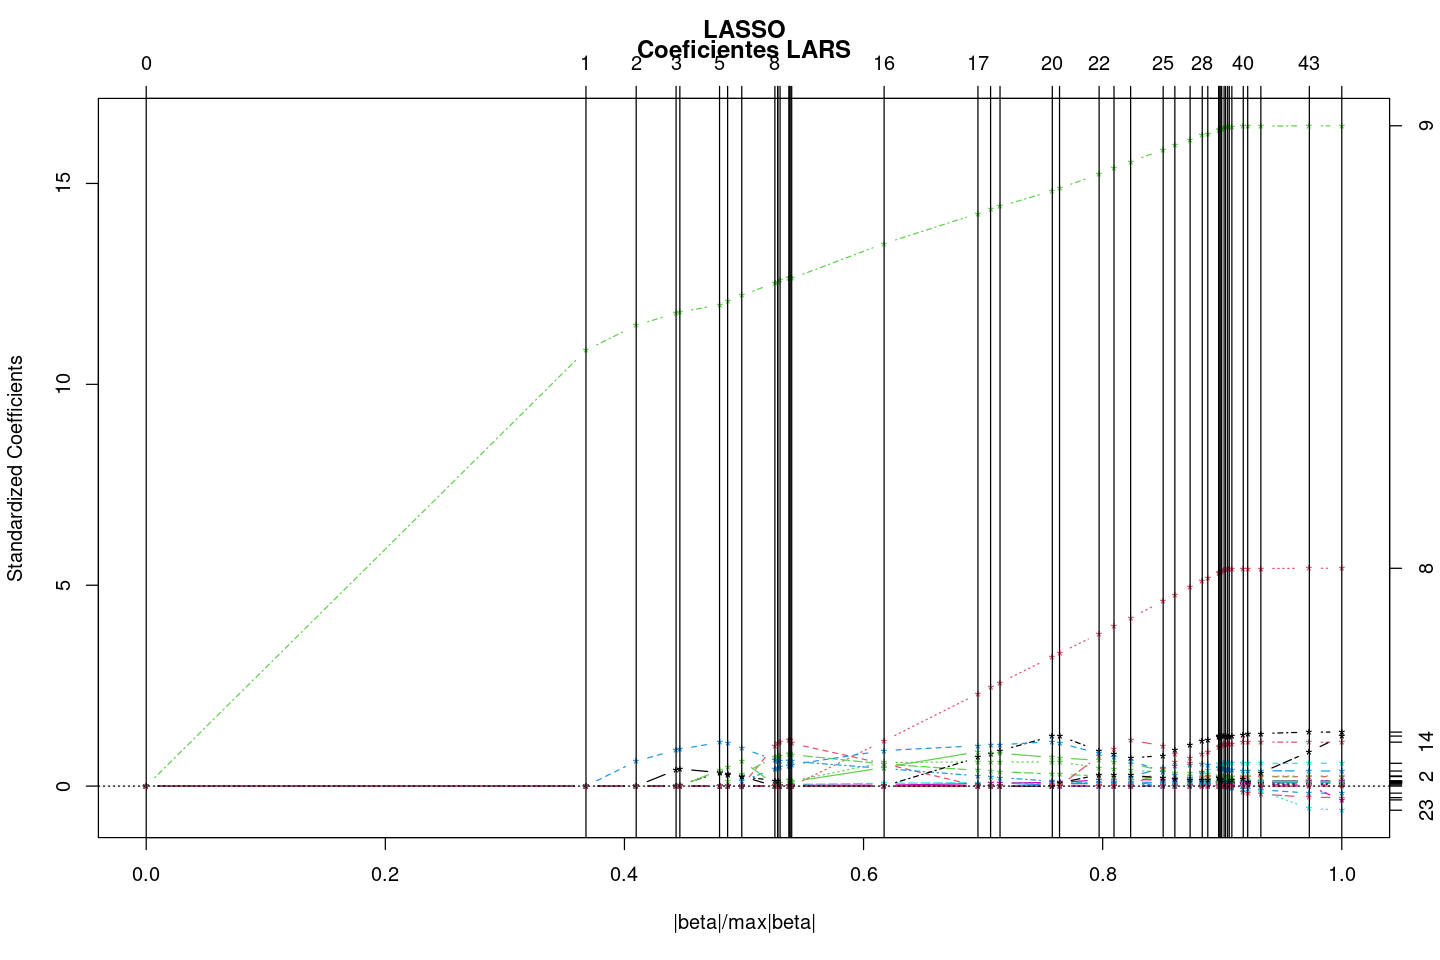

In [76]:
# Graficar coeficientes Lasso
plot(lasso_model)
title("Coeficientes Lasso")

# Graficar coeficientes LARS
plot(lars_model)
title("Coeficientes LARS")


En estos dos graficos se puede observar el comportamiento de cada uno de los algoritmos. El primero Lasso, muestra la evalucion del mse y la cantidad de variables (eje horizontal superior) en funcion de la penalizacion lambda (eje horizontal inferior). Se ve como cada paso o "step" es fijo (es decir, el lamda es una constante).

El segundo grafico, muestra la evolucion de los coeficientes (eje y) en funcion de los step del algoritmo lars. En cada paso, LARS ajusta los coeficientes de las variables a medida que incorpora variables al modelo.
Es importante destacar que, a diferencia de Lasso, que penaliza los coeficientes de manera constante, LARS permite una dinámica más fluida en la evolución de los coeficientes, ajustándolos a medida que avanza por las diferentes variables

In [67]:
coef(lars_model)

Savanna.fires,Forest.fires,Crop.Residues,Rice.Cultivation,Drained.organic.soils..CO2.,Pesticides.Manufacturing,Food.Transport,Forestland,Net.Forest.conversion,Food.Household.Consumption,⋯,IPPU,Manure.applied.to.Soils,Manure.left.on.Pasture,Manure.Management,Fires.in.humid.tropical.forests,Rural.population,Urban.population,Total.Population...Male,Total.Population...Female,Average.Temperature..C
0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.0000000,0.000000000,⋯,0.00000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000e+00
0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7050094,0.000000000,⋯,0.00000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000e+00
0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7452577,0.000000000,⋯,0.00000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.038965109,0.000000000,0.000000000,0.000000000,0.000000e+00
0.028543653,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7649397,0.000000000,⋯,0.00000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.056577223,0.000000000,0.000000000,0.000000000,0.000000e+00
0.030297543,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7667117,0.000000000,⋯,0.00000000,0.0000000000,0.001392192,0.000000000,0.000000000,0.057800558,0.000000000,0.000000000,0.000000000,0.000000e+00
0.023976236,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7783809,0.000000000,⋯,0.00000000,0.0000000000,0.022040841,0.000000000,0.026160067,0.068336015,0.000000000,0.000000000,0.000000000,0.000000e+00
0.021567838,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7848752,0.000000000,⋯,0.00000000,0.0000000000,0.017758859,0.000000000,0.031666225,0.068248508,0.000000000,0.000000000,0.000000000,0.000000e+00
0.017283638,0.000000000,0.000000000,0.007952532,0.0000000000,0.000000000,0.0000000000,0.00000000,0.7934938,0.000000000,⋯,0.00000000,0.0000000000,0.014900044,0.000000000,0.042053027,0.059410135,0.000000000,0.000000000,0.000000000,0.000000e+00
0.000000000,0.066977483,0.000000000,0.027043191,0.0000000000,0.000000000,0.0000000000,0.00000000,0.8141891,0.000000000,⋯,0.00000000,0.0000000000,0.008716001,0.000000000,0.002213967,0.041062092,0.000000000,0.000000000,0.000000000,0.000000e+00
0.000000000,0.070869696,0.000000000,0.028611669,0.0000000000,0.000000000,0.0000000000,0.00000000,0.8158486,0.000000000,⋯,0.00000000,0.0000000000,0.007639981,0.000000000,0.000000000,0.039465314,0.000000000,0.000000000,0.000000000,0.000000e+00


In [70]:
summary(lars_model)

,Df,Rss,Cp
,<dbl>,<dbl>,<dbl>
0,1,2.371037e+02,5.836499e+07
1,2,2.283661e+01,5.621193e+06
2,3,1.329292e+01,3.271929e+06
3,4,7.789776e+00,1.917282e+06
4,5,7.361798e+00,1.811934e+06
5,6,3.821633e+00,9.404919e+05
6,7,3.306228e+00,8.136221e+05
7,8,2.542338e+00,6.255856e+05
8,9,1.424765e+00,3.504870e+05


In [61]:
methods(class = "lars")


[1] coef    plot    predict print   summary
see '?methods' for accessing help and source code

In [73]:
y_pred_lars_step1 <- y_pred_lars[, 1]   
y_pred_lars_step2 <- y_pred_lars[, 2]   
y_pred_lars_step3 <- y_pred_lars[, 3]   
y_pred_lars_step4 <- y_pred_lars[, 4]
y_pred_lars_step5 <- y_pred_lars[, 5]
y_pred_lars_step6 <- y_pred_lars[, 6]
y_pred_lars_step7 <- y_pred_lars[, 7]
y_pred_lars_step8 <- y_pred_lars[, 8]
y_pred_lars_step9 <- y_pred_lars[, 9]
y_pred_lars_full <- y_pred_lars[, ncol(y_pred_lars)] 

In [75]:

mse_step1 <- mean((y_test - y_pred_lars_step1)^2)
mse_step2 <- mean((y_test - y_pred_lars_step2)^2)
mse_step3 <- mean((y_test - y_pred_lars_step3)^2)
mse_step4 <- mean((y_test - y_pred_lars_step4)^2)
mse_step5 <- mean((y_test - y_pred_lars_step5)^2)
mse_step6 <- mean((y_test - y_pred_lars_step6)^2)
mse_step7 <- mean((y_test - y_pred_lars_step7)^2)
mse_step8 <- mean((y_test - y_pred_lars_step8)^2)
mse_step9 <- mean((y_test - y_pred_lars_step9)^2)
mse_full <- mean((y_test - y_pred_lars_full)^2)

cat("MSE - Paso 1:", mse_step1, "\n")
cat("MSE - Paso 2:", mse_step2, "\n")
cat("MSE - Paso 3:", mse_step3, "\n")
cat("MSE - Paso 4:", mse_step4, "\n")
cat("MSE - Paso 5:", mse_step5, "\n")
cat("MSE - Paso 6:", mse_step6, "\n")
cat("MSE - Paso 7:", mse_step7, "\n")
cat("MSE - Paso 8:", mse_step8, "\n")
cat("MSE - Paso 9:", mse_step9, "\n")
cat("MSE - Modelo completo:", mse_full, "\n")


MSE - Paso 1: 1.198781 
MSE - Paso 2: 0.1076154 
MSE - Paso 3: 0.06290881 
MSE - Paso 4: 0.0347651 
MSE - Paso 5: 0.03273128 
MSE - Paso 6: 0.01723908 
MSE - Paso 7: 0.01516993 
MSE - Paso 8: 0.01194929 
MSE - Paso 9: 0.006708629 
MSE - Modelo completo: 8.245909e-06 
